<H1>Super Market Sales Analytics</H1>

<H2>Data Loading</H2>

In [1]:
#Importing libraries needed and set configuration to show max rows & columns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
#Load attrition dataset into dataframe
supermarket_df = pd.read_csv ("Supermarket_Sales_Dataset.csv") 
supermarket_df.head()

Invoice ID Branch       City Customer Type  Gender  \
0  750-67-8428      A  Bangalore        Member  Female   
1  226-31-3081      C     Mysore        Normal  Female   
2  631-41-3108      A  Bangalore        Normal    Male   
3  123-19-1176      A  Bangalore        Member    Male   
4  373-73-7910      A  Bangalore        Normal    Male   

             Product Type  Unit Price  Quantity     Tax   Selling Price  \
0       Health and beauty       74.69         7  26.1415       548.9715   
1  Electronic accessories       15.28         5   3.8200        80.2200   
2      Home and lifestyle       46.33         7  16.2155       340.5255   
3       Health and beauty       58.22         8  23.2880       489.0480   
4       Sports and travel       86.31         7  30.2085       634.3785   

        Date   Time Payment Type  Cost Price  Gross Income  Rating  
0   1/5/2019  13:08   Debit card      522.83       26.1415     9.1  
1   3/8/2019  10:29         Cash       76.40        3.8200     9.6  
2   3/3/2019  13:23  Credit card      324.31       16.2155     7.4  
3  1/27/2019  20:33   Debit card      465.76       23.2880     8.4  
4   2/8/2019  10:37   Debit card      604.17       30.2085     5.3

<H1>Check Duplicates</H1>

In [2]:
duplicate_rows_data = supermarket_df[supermarket_df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 16)


<H2>Exploratory Data Analysis & Processing</H2>

In [3]:
supermarket_df.rename(columns= {'Invoice ID': 'ID',
                    'Customer Type': 'CustomerType',
                    'Product Type': 'ProductType',
                    'Unit Price': 'UnitPrice',
                    'Selling Price': 'SellingPrice',
                    'Payment Type': 'PaymentType',
                    'Cost Price': 'CostPrice',
                    'Gross Income': 'GrossIncome',
                    }, inplace=True)

In [5]:
# Explore on the data & print the information
print("Total number of dataset", supermarket_df.shape[0])
print("Total number of features", supermarket_df.shape[1])
print("SuperMarket Sales DataSet Information")
supermarket_df.info()
supermarket_df.dtypes


# Remove "NaN" tuple and convert the data type of the column to integer


print(supermarket_df.dtypes)

# Check for null entries 
print(supermarket_df.isnull().sum())

supermarket_df.describe()



Total number of dataset 1000
Total number of features 16
SuperMarket Sales DataSet Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            1000 non-null   object 
 1   Branch        1000 non-null   object 
 2   City          1000 non-null   object 
 3   CustomerType  1000 non-null   object 
 4   Gender        1000 non-null   object 
 5   ProductType   1000 non-null   object 
 6   UnitPrice     1000 non-null   float64
 7   Quantity      1000 non-null   int64  
 8   Tax           1000 non-null   float64
 9   SellingPrice  1000 non-null   float64
 10  Date          1000 non-null   object 
 11  Time          1000 non-null   object 
 12  PaymentType   1000 non-null   object 
 13  CostPrice     1000 non-null   float64
 14  GrossIncome   1000 non-null   float64
 15  Rating        1000 non-null   float64
dtypes: float64(6), int64

UnitPrice     Quantity         Tax   SellingPrice   CostPrice  \
count  1000.000000  1000.000000  1000.000000   1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369    322.966749   307.58738   
std      26.494628     2.923431    11.708825    245.885335   234.17651   
min      10.080000     1.000000     0.508500     10.678500    10.17000   
25%      32.875000     3.000000     5.924875    124.422375   118.49750   
50%      55.230000     5.000000    12.088000    253.848000   241.76000   
75%      77.935000     8.000000    22.445250    471.350250   448.90500   
max      99.960000    10.000000    49.650000   1042.650000   993.00000   

       GrossIncome      Rating  
count  1000.000000  1000.00000  
mean     15.379369     6.97270  
std      11.708825     1.71858  
min       0.508500     4.00000  
25%       5.924875     5.50000  
50%      12.088000     7.00000  
75%      22.445250     8.50000  
max      49.650000    10.00000

Bangalore    340
Mangalore    332
Mysore       328
Name: City, dtype: int64


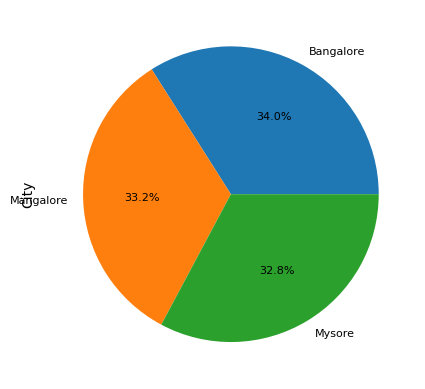

In [6]:
#Checking data distribution for attrition - target variable
supermarket_df['City'].value_counts().plot(kind='pie',autopct='%1.1f%%', fontsize=8)
print(supermarket_df['City'].value_counts())

<H2> Data Distribution Analysis </H2>

Female    501
Male      499
Name: Gender, dtype: int64


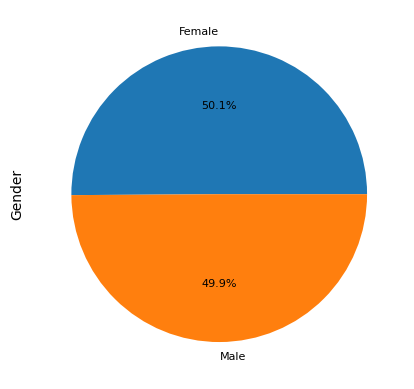

In [7]:
#Checking data distribution for attrition - target variable
supermarket_df['Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%', fontsize=8)
print(supermarket_df['Gender'].value_counts())

Member    501
Normal    499
Name: CustomerType, dtype: int64


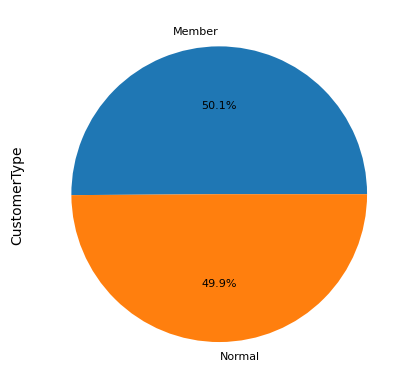

In [8]:
supermarket_df['CustomerType'].value_counts().plot(kind='pie',autopct='%1.1f%%', fontsize=8)
print(supermarket_df['CustomerType'].value_counts())

In [9]:
customertype_city = supermarket_df.groupby('City')['CustomerType'].value_counts()
customertype_city

City       CustomerType
Bangalore  Normal          173
           Member          167
Mangalore  Normal          167
           Member          165
Mysore     Member          169
           Normal          159
Name: CustomerType, dtype: int64

In [10]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
import plotly.express as px
#visualize Customer type per City
vis1= px.histogram(supermarket_df, x='CustomerType', color='City')
vis1.show()

In [12]:
#Best payment per City
pay = supermarket_df.groupby('City')['PaymentType'].value_counts()
pay

City       PaymentType
Bangalore  Debit card     126
           Cash           110
           Credit card    104
Mangalore  Debit card     113
           Cash           110
           Credit card    109
Mysore     Cash           124
           Debit card     106
           Credit card     98
Name: PaymentType, dtype: int64

In [13]:
#visualize payment per City
vis2 = px.histogram(supermarket_df, x='PaymentType', color='City', barmode='group', title='Methods of payment by City')
vis2.show()

In [15]:
quant = px.bar(supermarket_df, x='SellingPrice', y='City', color='City', animation_frame='Date',animation_group="City",
                        title='Selling Price Variation in Cities per Date')
quant.show()

<H1>Outlier Analysis</H1>

<AxesSubplot:>

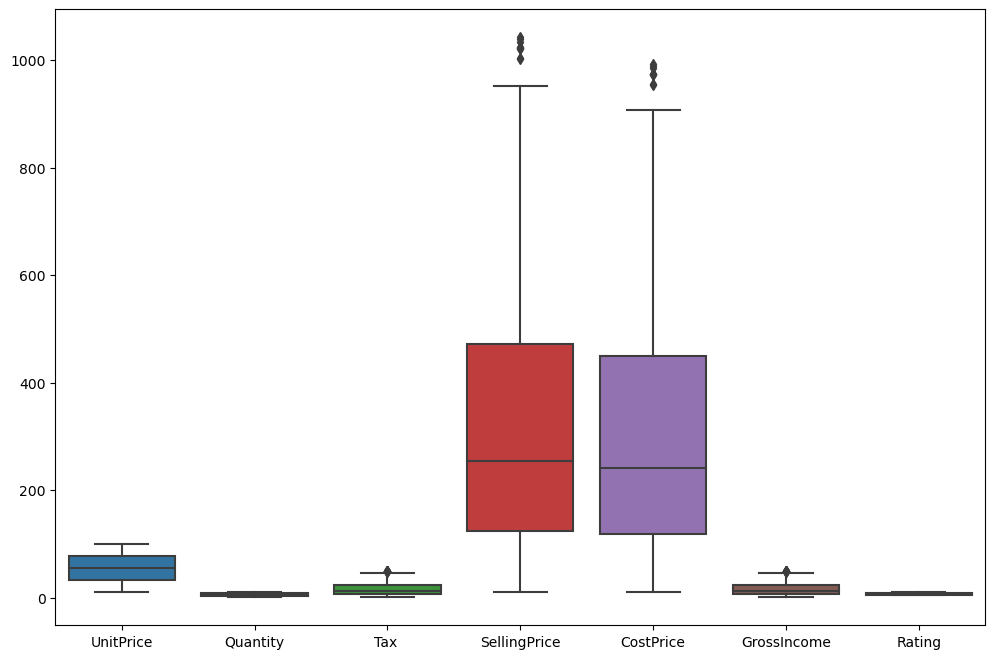

In [16]:
plt.figure(figsize=(12,8))
sns.boxplot(data=supermarket_df)

In [17]:
# method to replace the outlier with median
def Outliers(col):
    Median = supermarket_df[col].quantile(0.50)
    Max = supermarket_df[col].quantile(0.95)
    supermarket_df[col] = np.where(supermarket_df[col]>Max, Median,supermarket_df[col])
    return supermarket_df[col]

In [18]:
# call the outlier function with the columns identified
Outliers("SellingPrice")
Outliers("CostPrice")
Outliers("GrossIncome")
Outliers("Tax ")

0      26.1415
1       3.8200
2      16.2155
3      23.2880
4      30.2085
5      29.8865
6      20.6520
7      36.7800
8       3.6260
9       8.2260
10      2.8960
11      5.1020
12     11.7375
13     21.5950
14     35.6900
15     28.1160
16     24.1255
17     21.7830
18      8.2005
19      4.0300
20     21.5100
21     13.1970
22      3.3200
23      8.6400
24     13.2945
25     21.0360
26      1.6760
27      8.7670
28     22.0900
29     11.2005
30     23.5325
31     35.1315
32     33.5120
33      9.6580
34     19.8840
35      3.4060
36     15.6550
37     27.3960
38     21.9680
39     12.0480
40      4.3360
41      5.6110
42     20.7360
43     12.0880
44      1.5370
45     18.7920
46     25.5105
47      9.0045
48      5.6790
49     12.0880
50     31.9900
51     11.1475
52      3.5740
53      0.7715
54      1.6160
55     34.3920
56      4.4340
57     35.8400
58     36.1750
59      9.1830
60      3.7110
61     16.7190
62     24.7815
63      7.9050
64     15.1480
65      7.9350
66      3.

<AxesSubplot:>

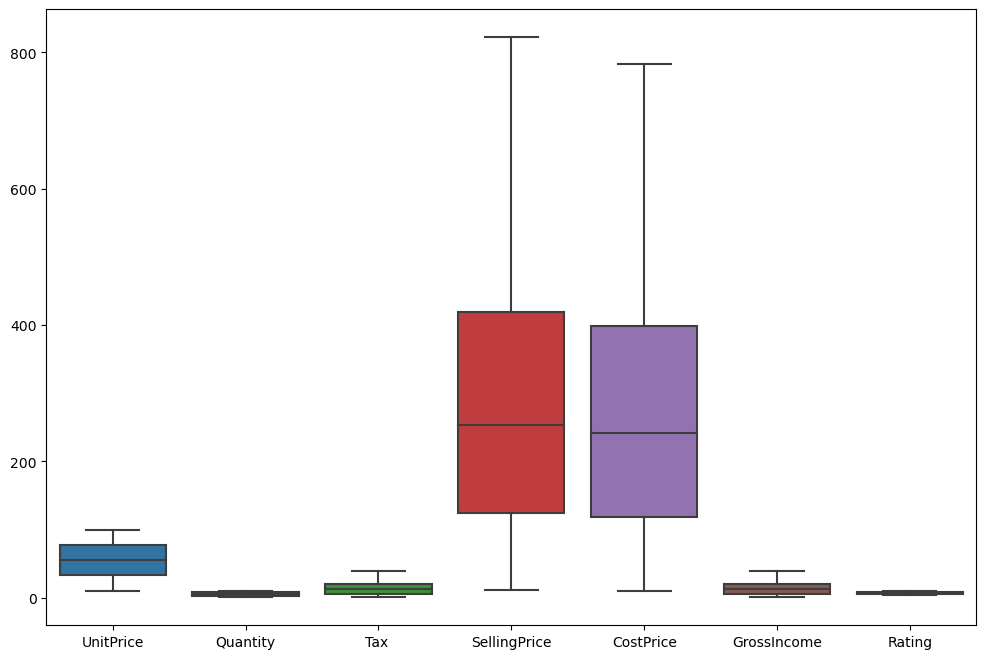

In [20]:
# after replacing the outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=supermarket_df)

In [21]:
branches = supermarket_df.Branch.value_counts()
branches

A    340
B    332
C    328
Name: Branch, dtype: int64

<AxesSubplot:xlabel='Branch', ylabel='count'>

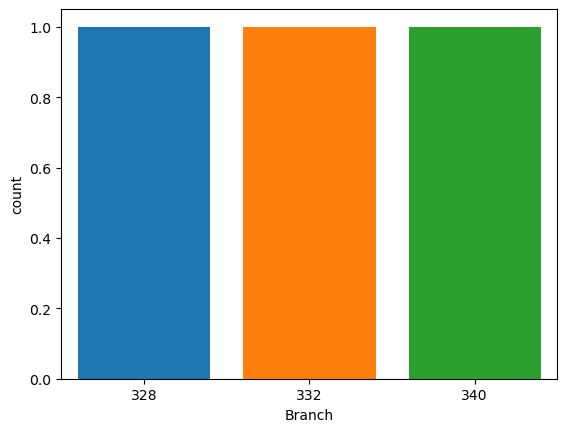

In [22]:
sns.countplot(data=supermarket_df,x=branches, saturation=True)

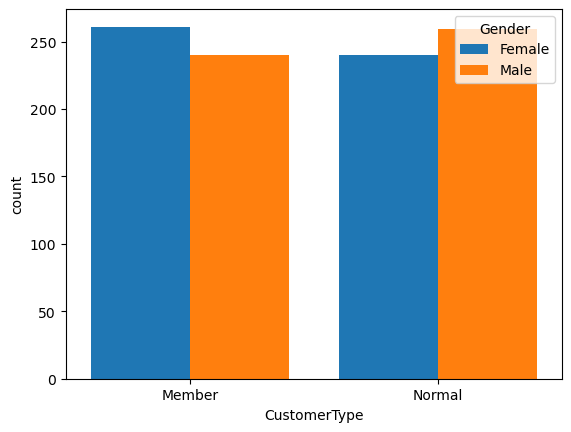

In [23]:
sns.countplot(data = supermarket_df,x="CustomerType", hue="Gender",saturation=True);

In [24]:
prod = supermarket_df["ProductType"].value_counts()
prod

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: ProductType, dtype: int64

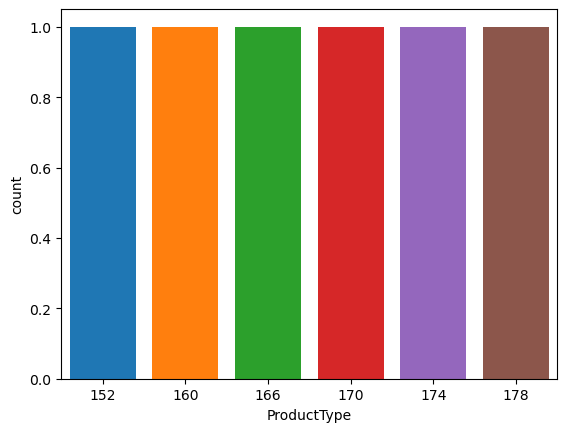

In [25]:
sns.countplot(data=supermarket_df, x=prod,saturation=True);

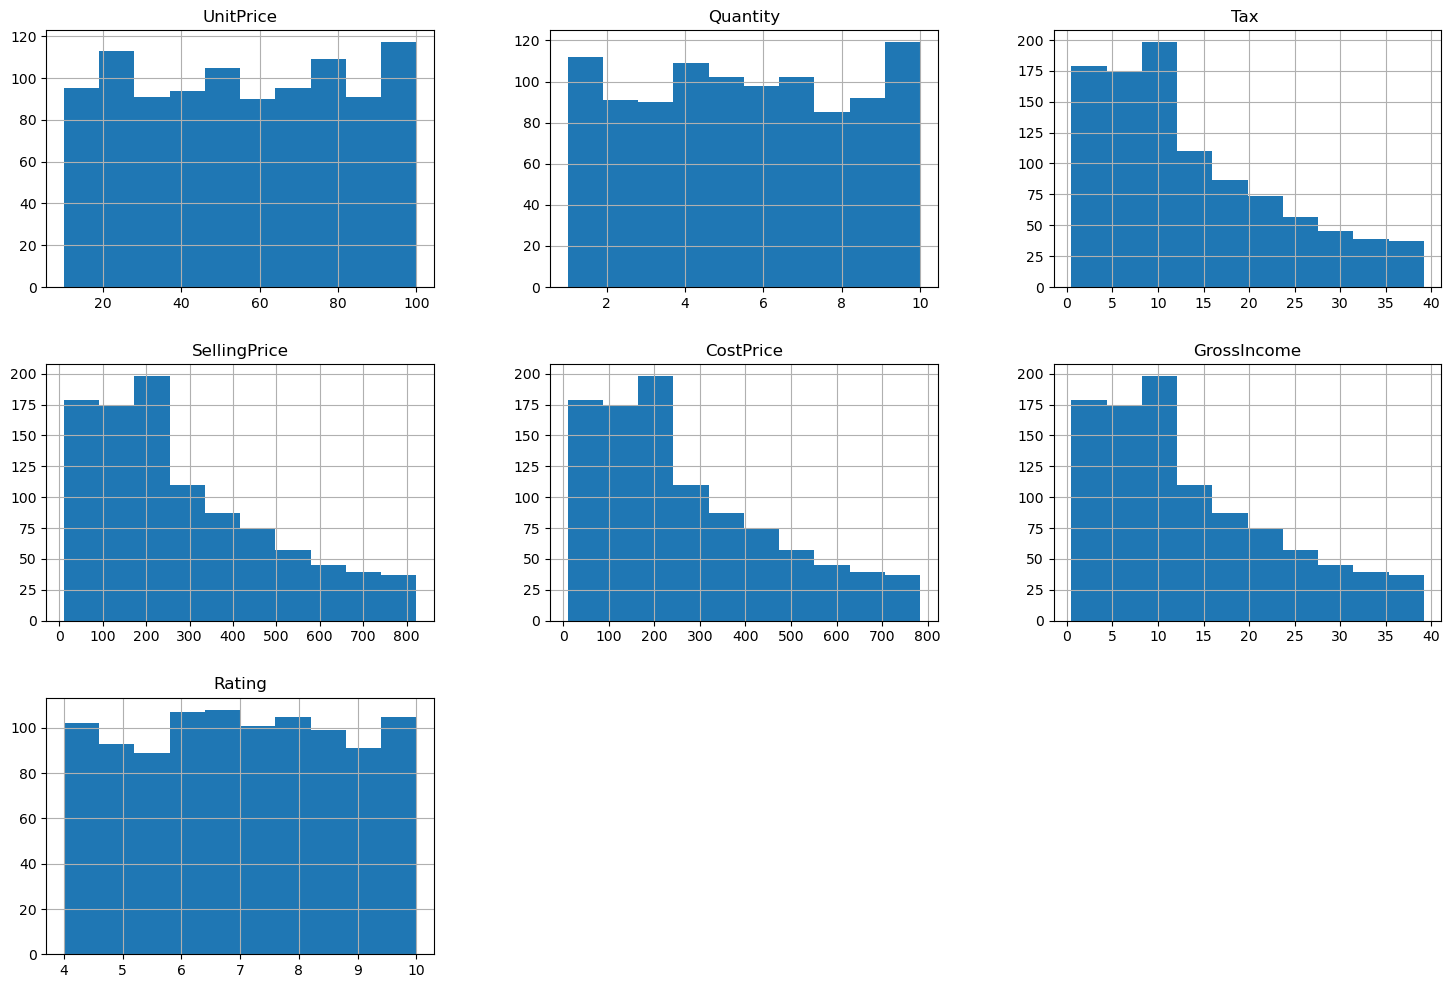

In [26]:
supermarket_df.hist(figsize=(18,12))
plt.show()

<H1>Data wrangling / pre-processing </H1>

In [28]:
supermarket_df['ProductType'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [33]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
supermarket_df['ProductType']= label_encoder.fit_transform(supermarket_df['ProductType'])
supermarket_df['ProductType'].unique()

array([3, 0, 4, 5, 2, 1], dtype=int64)

In [34]:
supermarket_df['Gender'].unique()

array([1, 0], dtype=int64)

In [35]:
supermarket_df['Gender']=supermarket_df['Gender'].replace({'Male':0,'Female':1})
supermarket_df['Gender'].unique()

array([1, 0], dtype=int64)

In [36]:
supermarket_df['City'].unique()

array(['Bangalore', 'Mysore', 'Mangalore'], dtype=object)

In [37]:
label_encoder = preprocessing.LabelEncoder()
supermarket_df['City']= label_encoder.fit_transform(supermarket_df['City'])
supermarket_df['City'].unique()

array([0, 2, 1])

In [38]:
supermarket_df['CustomerType'].unique()

array(['Member', 'Normal'], dtype=object)

In [39]:
supermarket_df['CustomerType']=supermarket_df['CustomerType'].replace({'Member':0,'Normal':1})
supermarket_df['CustomerType'].unique()

array([0, 1], dtype=int64)

In [40]:
supermarket_df['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

In [42]:
label_encoder = preprocessing.LabelEncoder()
supermarket_df['Branch']= label_encoder.fit_transform(supermarket_df['Branch'])
supermarket_df['Branch'].unique()

array([0, 2, 1], dtype=int64)

In [43]:
supermarket_df['PaymentType'].unique()

array(['Debit card', 'Cash', 'Credit card'], dtype=object)

In [44]:
label_encoder = preprocessing.LabelEncoder()
supermarket_df['PaymentType']= label_encoder.fit_transform(supermarket_df['PaymentType'])
supermarket_df['PaymentType'].unique()

array([2, 0, 1])

In [45]:
supermarket_df['Rating'].unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

In [46]:
supermarket_df['Rating']=supermarket_df['Rating'].apply(lambda y:0 if y < 7.5 else 1)

In [47]:
supermarket_df['Date'] = pd.to_datetime(supermarket_df['Date'])
supermarket_df['weekday'] = supermarket_df['Date'].dt.day_name()
supermarket_df['month'] = supermarket_df['Date'].dt.month_name()

In [48]:
supermarket_df['weekday']= label_encoder.fit_transform(supermarket_df['weekday'])
supermarket_df['month']= label_encoder.fit_transform(supermarket_df['month'])

In [49]:
#Adding Time column in Hours
supermarket_df['Time_Hour'] = pd.to_datetime(supermarket_df['Time']).dt.hour
supermarket_df.head(5)

ID  Branch  City  CustomerType  Gender  ProductType  UnitPrice  \
0  750-67-8428       0     0             0       1            3      74.69   
1  226-31-3081       2     2             1       1            0      15.28   
2  631-41-3108       0     0             1       0            4      46.33   
3  123-19-1176       0     0             0       0            3      58.22   
4  373-73-7910       0     0             1       0            5      86.31   

   Quantity     Tax   SellingPrice       Date   Time  PaymentType  CostPrice  \
0         7  26.1415      548.9715 2019-01-05  13:08            2     522.83   
1         5   3.8200       80.2200 2019-03-08  10:29            0      76.40   
2         7  16.2155      340.5255 2019-03-03  13:23            1     324.31   
3         8  23.2880      489.0480 2019-01-27  20:33            2     465.76   
4         7  30.2085      634.3785 2019-02-08  10:37            2     604.17   

   GrossIncome  Rating  weekday  month  Time_Hour  
0      26.1415       1        2      1         13  
1       3.8200       1        0      2         10  
2      16.2155       0        3      2         13  
3      23.2880       1        3      1         20  
4      30.2085       0        0      0         10

In [50]:
supermarket_df.head()

ID  Branch  City  CustomerType  Gender  ProductType  UnitPrice  \
0  750-67-8428       0     0             0       1            3      74.69   
1  226-31-3081       2     2             1       1            0      15.28   
2  631-41-3108       0     0             1       0            4      46.33   
3  123-19-1176       0     0             0       0            3      58.22   
4  373-73-7910       0     0             1       0            5      86.31   

   Quantity     Tax   SellingPrice       Date   Time  PaymentType  CostPrice  \
0         7  26.1415      548.9715 2019-01-05  13:08            2     522.83   
1         5   3.8200       80.2200 2019-03-08  10:29            0      76.40   
2         7  16.2155      340.5255 2019-03-03  13:23            1     324.31   
3         8  23.2880      489.0480 2019-01-27  20:33            2     465.76   
4         7  30.2085      634.3785 2019-02-08  10:37            2     604.17   

   GrossIncome  Rating  weekday  month  Time_Hour  
0      26.1415       1        2      1         13  
1       3.8200       1        0      2         10  
2      16.2155       0        3      2         13  
3      23.2880       1        3      1         20  
4      30.2085       0        0      0         10

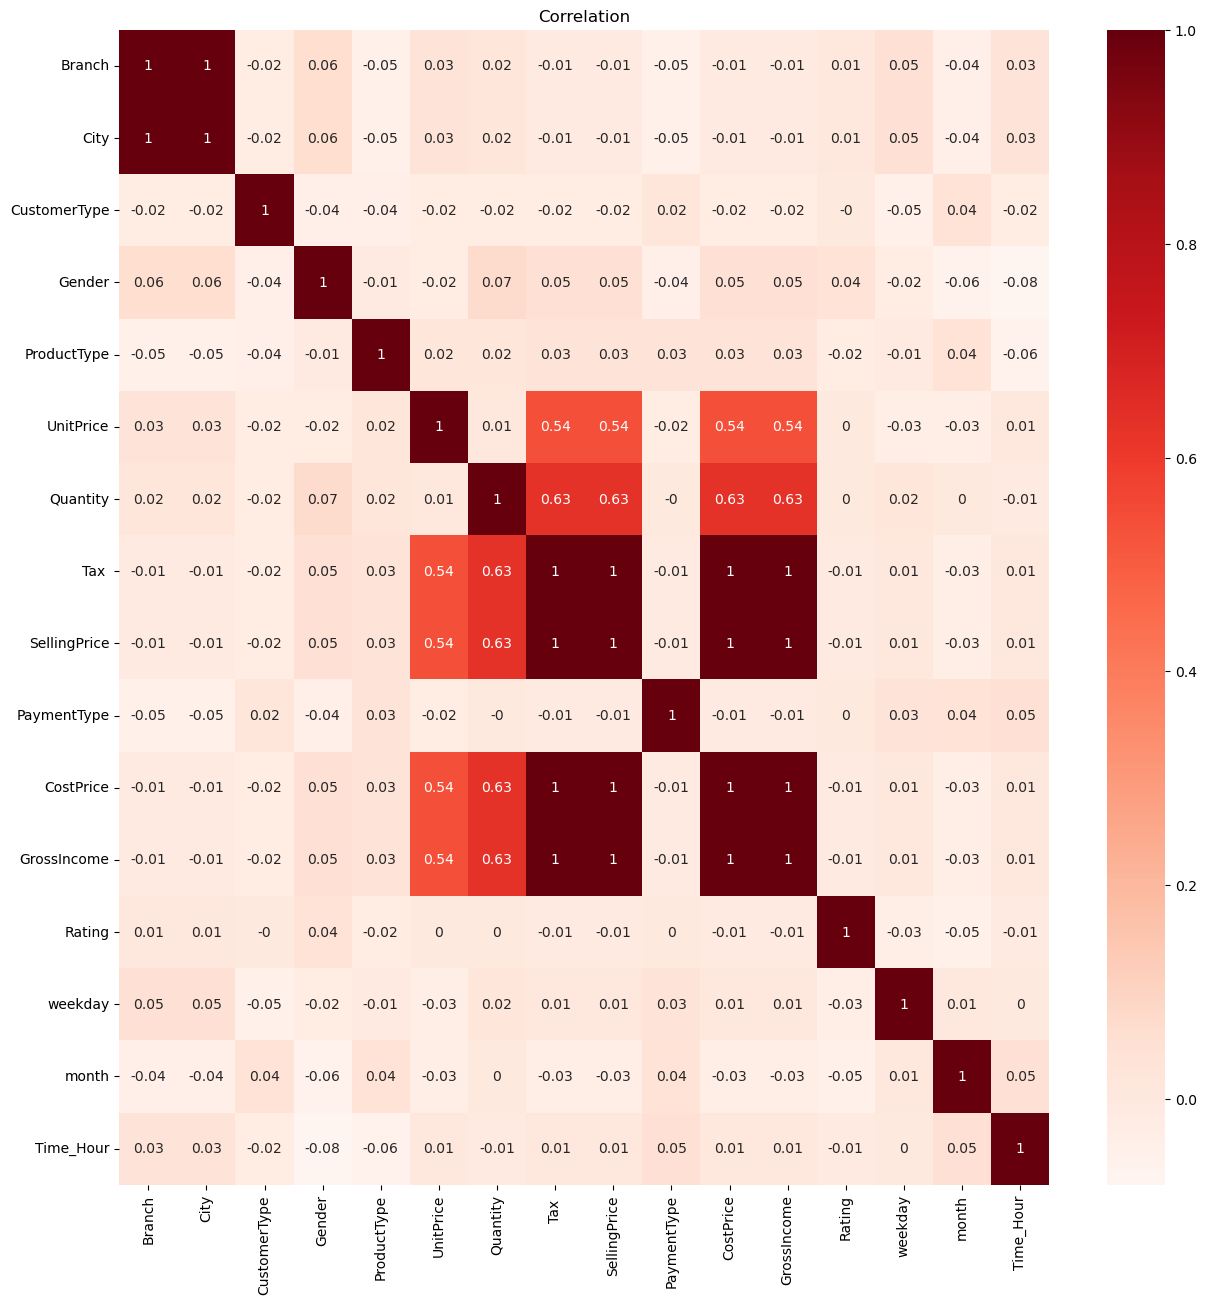

In [51]:
correlation = supermarket_df.corr().round(2)
plt.figure(figsize=(15,15))
sns.heatmap(correlation,annot=True,cmap=plt.cm.Reds).set_title('Correlation')
plt.show()

In [52]:
df=supermarket_df.drop(labels=['ID','Date','Time'],axis=1)

In [53]:
df.head(3)

Branch  City  CustomerType  Gender  ProductType  UnitPrice  Quantity  \
0       0     0             0       1            3      74.69         7   
1       2     2             1       1            0      15.28         5   
2       0     0             1       0            4      46.33         7   

      Tax   SellingPrice  PaymentType  CostPrice  GrossIncome  Rating  \
0  26.1415      548.9715            2     522.83      26.1415       1   
1   3.8200       80.2200            0      76.40       3.8200       1   
2  16.2155      340.5255            1     324.31      16.2155       0   

   weekday  month  Time_Hour  
0        2      1         13  
1        0      2         10  
2        3      2         13

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Branch        1000 non-null   int64  
 1   City          1000 non-null   int32  
 2   CustomerType  1000 non-null   int64  
 3   Gender        1000 non-null   int64  
 4   ProductType   1000 non-null   int64  
 5   UnitPrice     1000 non-null   float64
 6   Quantity      1000 non-null   int64  
 7   Tax           1000 non-null   float64
 8   SellingPrice  1000 non-null   float64
 9   PaymentType   1000 non-null   int32  
 10  CostPrice     1000 non-null   float64
 11  GrossIncome   1000 non-null   float64
 12  Rating        1000 non-null   int64  
 13  weekday       1000 non-null   int32  
 14  month         1000 non-null   int32  
 15  Time_Hour     1000 non-null   int64  
dtypes: float64(5), int32(4), int64(7)
memory usage: 109.5 KB


In [55]:
df = df[df['UnitPrice'].notna()]
df['UnitPrice'] = df['UnitPrice'].astype(int)

In [56]:
df = df[df['SellingPrice'].notna()]
df['SellingPrice'] = df['SellingPrice'].astype(int)

df = df[df['CostPrice'].notna()]
df['CostPrice'] = df['CostPrice'].astype(int)

df = df[df['GrossIncome'].notna()]
df['GrossIncome'] = df['GrossIncome'].astype(int)

df = df[df['Rating'].notna()]
df['Rating'] = df['Rating'].astype(int)

In [57]:
df=df[df['Tax '].notna()]
df['Tax ']=df['Tax '].astype(int)

In [58]:
df.head()

Branch  City  CustomerType  Gender  ProductType  UnitPrice  Quantity  Tax   \
0       0     0             0       1            3         74         7    26   
1       2     2             1       1            0         15         5     3   
2       0     0             1       0            4         46         7    16   
3       0     0             0       0            3         58         8    23   
4       0     0             1       0            5         86         7    30   

   SellingPrice  PaymentType  CostPrice  GrossIncome  Rating  weekday  month  \
0           548            2        522           26       1        2      1   
1            80            0         76            3       1        0      2   
2           340            1        324           16       0        3      2   
3           489            2        465           23       1        3      1   
4           634            2        604           30       0        0      0   

   Time_Hour  
0         13  
1         10  
2         13  
3         20  
4         10

<H1>Feature selection engineering techniques</H1>

In [59]:
x = df.drop(['Rating'],axis=1)
y = df['Rating']

        Features  Importances
2   CustomerType     0.024693
3         Gender     0.025841
1           City     0.031135
0         Branch     0.032077
9    PaymentType     0.041665
13         month     0.044394
11   GrossIncome     0.065442
7           Tax      0.066639
6       Quantity     0.067496
4    ProductType     0.070720
12       weekday     0.074491
14     Time_Hour     0.092184
8   SellingPrice     0.116186
10     CostPrice     0.118794
5      UnitPrice     0.128242


<AxesSubplot:ylabel='Features'>

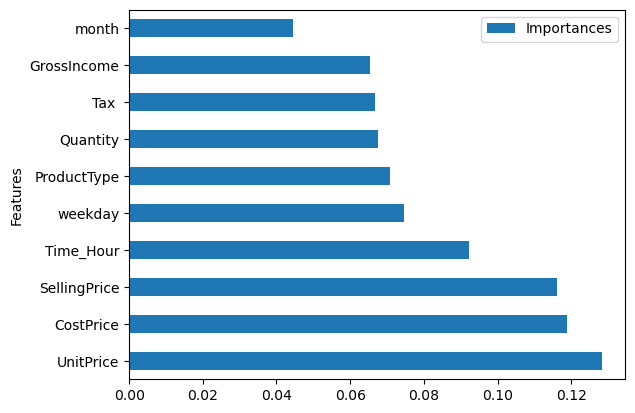

In [60]:
#Feature selection using RandomForestClassifier technique
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=340)
model.fit(x,y)
importances_random = model.feature_importances_

final_df=pd.DataFrame({"Features": x.columns,"Importances":importances_random})
final_df.set_index('Importances')
final_df= final_df.sort_values('Importances')
print(final_df)
final_df.nlargest(10,'Importances').plot.barh('Features','Importances')

        Features  Importances
1           City     0.000000
11   GrossIncome     0.000000
6       Quantity     0.064588
9    PaymentType     0.065392
13         month     0.072574
14     Time_Hour     0.074724
3         Gender     0.074758
8   SellingPrice     0.076828
5      UnitPrice     0.078999
10     CostPrice     0.079565
2   CustomerType     0.079646
12       weekday     0.080128
4    ProductType     0.081481
7           Tax      0.084461
0         Branch     0.086855


C:\Users\Santhi Nandakumar\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1421: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



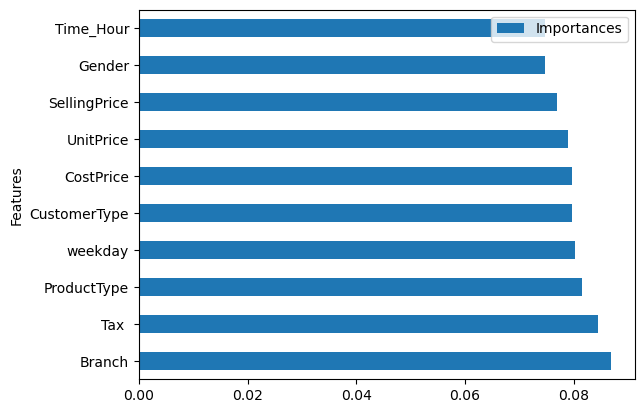

<Figure size 2000x1000 with 0 Axes>

In [61]:
#Feature selection by xgboost technique
import xgboost
from xgboost import plot_importance
xgb=xgboost.XGBClassifier(use_label_encoder=False)
xgb.fit(x,y)

importances=xgb.feature_importances_
columns=x.columns

final_df_xg=pd.DataFrame({"Features": x.columns,"Importances":importances})
final_df_xg.set_index('Importances')
final_df_xg= final_df_xg.sort_values('Importances')
print(final_df_xg)

final_df_xg.nlargest(10,'Importances').plot.barh('Features','Importances')
plt.figure(figsize=(20,10))
plt.show()

In [62]:
x.head(2)

Branch  City  CustomerType  Gender  ProductType  UnitPrice  Quantity  Tax   \
0       0     0             0       1            3         74         7    26   
1       2     2             1       1            0         15         5     3   

   SellingPrice  PaymentType  CostPrice  GrossIncome  weekday  month  \
0           548            2        522           26        2      1   
1            80            0         76            3        0      2   

   Time_Hour  
0         13  
1         10

**Top 7 features obtained by comparison of RF vs XGB**

In [63]:
x=x.drop(columns=['Branch','City','CustomerType','Gender','GrossIncome','weekday','month'])

# KMeans Clustering

In [64]:
from sklearn.cluster import KMeans

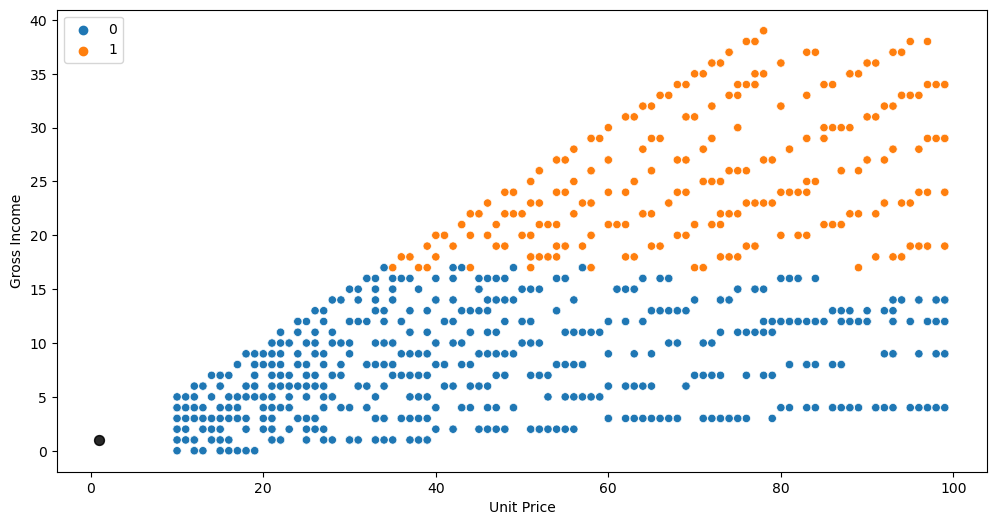

In [65]:
#k=2
kmeans=KMeans(n_clusters=2,random_state=0)
kmeans.fit(df)
cluster=kmeans.predict(df)

centers=kmeans.cluster_centers_

plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x="UnitPrice", y="GrossIncome", hue= cluster)
# Plot centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha = 0.6)
plt.xlabel("Unit Price")
plt.ylabel("Gross Income")
plt.show()

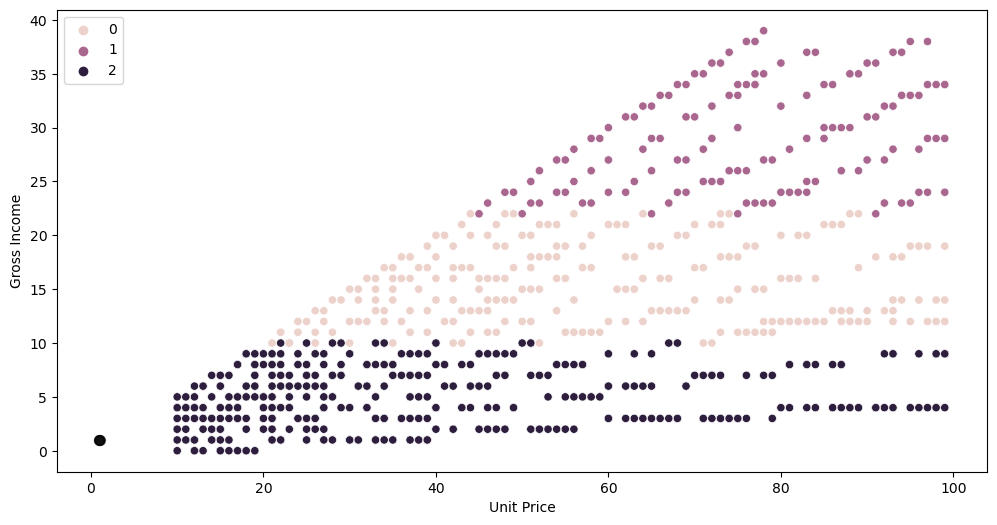

In [66]:
#k=3
kmeans=KMeans(n_clusters=3,random_state=0)
kmeans.fit(df)
cluster=kmeans.predict(df)

centers=kmeans.cluster_centers_

plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x="UnitPrice", y="GrossIncome", hue= cluster)
# Plot centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha = 0.6)
plt.xlabel("Unit Price")
plt.ylabel("Gross Income")
plt.show()

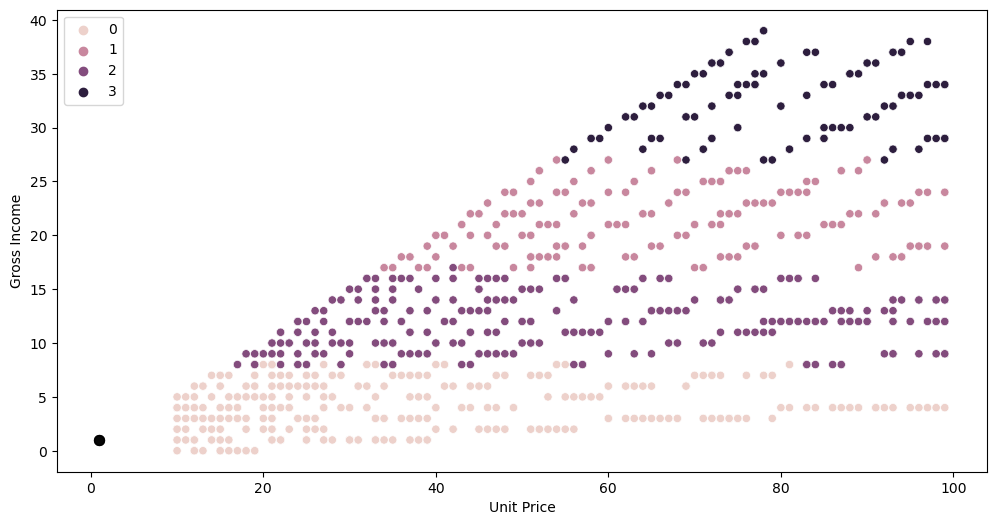

In [67]:
#k=4
kmeans=KMeans(n_clusters=4,random_state=0)
kmeans.fit(df)
cluster=kmeans.predict(df)

centers=kmeans.cluster_centers_

plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x="UnitPrice", y="GrossIncome", hue= cluster)
# Plot centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha = 0.6)
plt.xlabel("Unit Price")
plt.ylabel("Gross Income")
plt.show()

#K Mediods Clustering

In [71]:
data=df.copy

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score

In [73]:
scaler=StandardScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

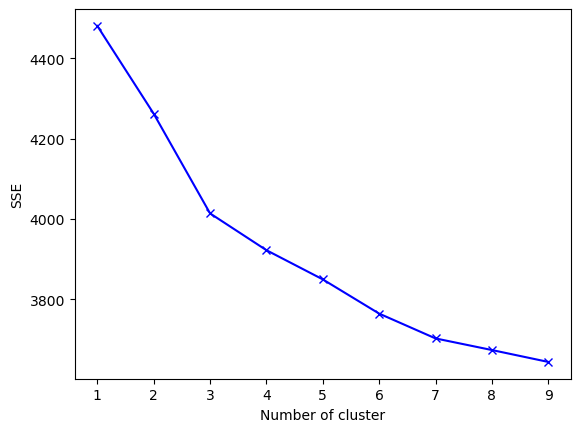

In [74]:
sse = {} 

for k in range(1, 10):
    kmedo = KMedoids(n_clusters=k, max_iter=1000, random_state=1).fit(df_scaled)
    sse[k] = kmedo.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [77]:
df_scaled_copy = df_scaled.copy(deep=True)

In [78]:
#k=4
kmedo = KMedoids(n_clusters = 4, random_state=1)
kmedo.fit(df_scaled)
df['KMedoids_Labels'] = kmedo.predict(df_scaled)
df['kmedoLabels'] = kmedo.predict(df_scaled)

In [79]:
df.kmedoLabels.value_counts()

2    292
0    266
1    227
3    215
Name: kmedoLabels, dtype: int64

In [80]:
original_features = ['Branch', 'City', 'CustomerType', 'Gender', 'ProductType',
       'UnitPrice', 'Quantity','SellingPrice', 'PaymentType', 'CostPrice', 'GrossIncome', 'Rating',
       'weekday','month']

mean = df.groupby('kmedoLabels').mean()
median = df.groupby('kmedoLabels').median()
df_kmedoids = pd.concat([mean, median], axis=0)
df_kmedoids.index = ['clus_0 Mean', 'clus_1 Mean', 'clus_2 Mean','clus_3 Mean', 'clus_0 Median', 'clus_1 Median', 'clus_2 Median','clus_3 Median']
df_kmedoids[original_features].T

clus_0 Mean  clus_1 Mean  clus_2 Mean  clus_3 Mean  \
Branch           0.221805     1.502203     1.092466     1.251163   
City             0.221805     1.502203     1.092466     1.251163   
CustomerType     0.436090     0.334802     0.794521     0.348837   
Gender           0.338346     0.409692     0.801370     0.390698   
ProductType      3.033835     2.555066     2.434932     1.646512   
UnitPrice       52.225564    46.854626    59.595890    61.548837   
Quantity         4.221805     4.211454     6.955479     6.511628   
SellingPrice   202.864662   172.625551   401.010274   368.990698   
PaymentType      1.011278     1.008811     0.962329     1.032558   
CostPrice      193.199248   164.343612   381.904110   351.423256   
GrossIncome      9.169173     7.718062    18.633562    17.158140   
Rating           0.357143     0.242291     0.270548     0.855814   
weekday          3.323308     3.603524     2.315068     3.134884   
month            1.270677     0.572687     1.116438     1.153488   

              clus_0 Median  clus_1 Median  clus_2 Median  clus_3 Median  
Branch                  0.0            2.0            1.0            1.0  
City                    0.0            2.0            1.0            1.0  
CustomerType            0.0            0.0            1.0            0.0  
Gender                  0.0            0.0            1.0            0.0  
ProductType             3.0            2.0            2.0            1.0  
UnitPrice              50.5           43.0           60.0           65.0  
Quantity                4.0            4.0            7.0            7.0  
SellingPrice          166.0          141.0          363.5          333.0  
PaymentType             1.0            1.0            1.0            1.0  
CostPrice             158.0          135.0          346.0          317.0  
GrossIncome             7.0            6.0           17.0           15.0  
Rating                  0.0            0.0            0.0            1.0  
weekday                 4.0            4.0            2.0            3.0  
month                   1.0            0.0            1.0            1.0

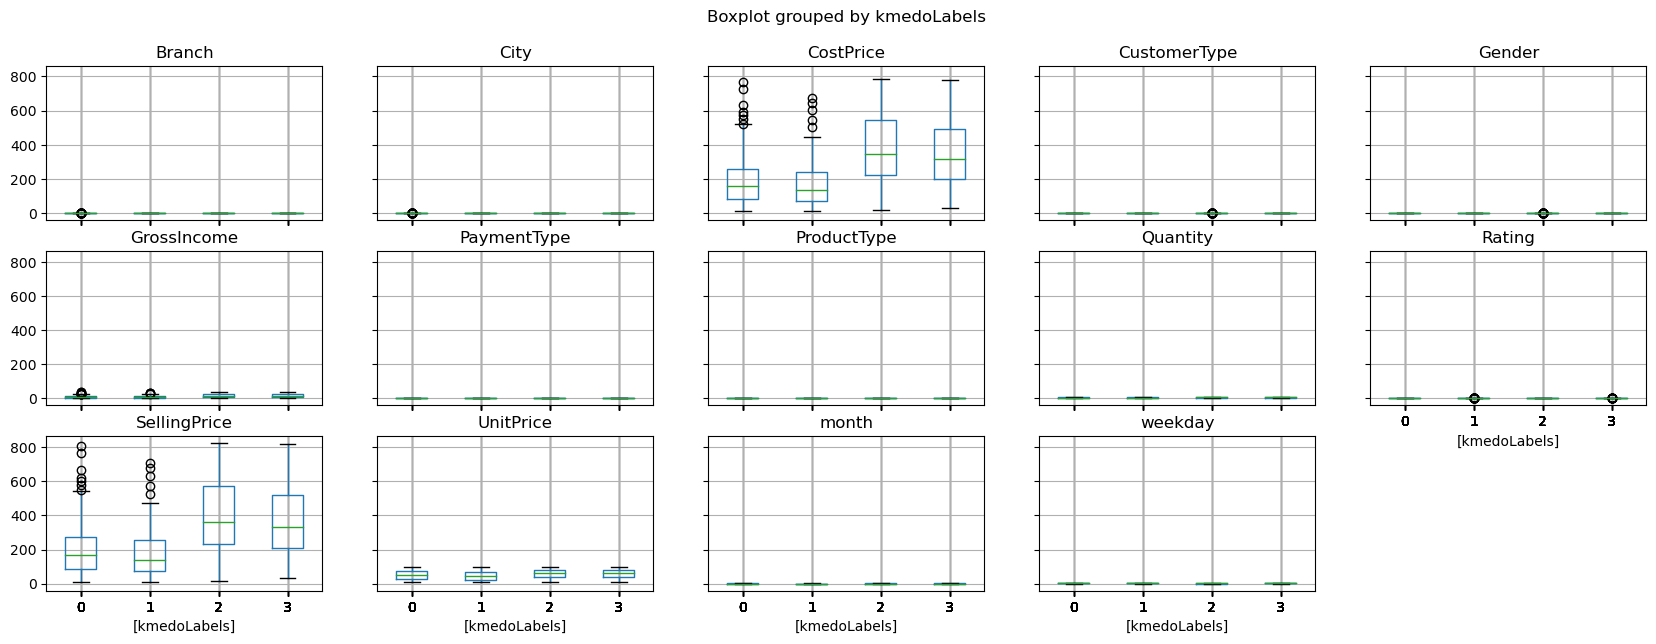

In [81]:
features_with_lables = ['Branch', 'City', 'CustomerType', 'Gender', 'ProductType','UnitPrice', 'Quantity','SellingPrice', 'PaymentType', 'CostPrice', 'GrossIncome', 'Rating',
       'weekday','month','kmedoLabels']

df[features_with_lables].boxplot(by = 'kmedoLabels', layout = (3,5),figsize=(20,7))
plt.show()

In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_scaled)

PCA(n_components=2)

In [84]:
feature = pca.transform(df_scaled)

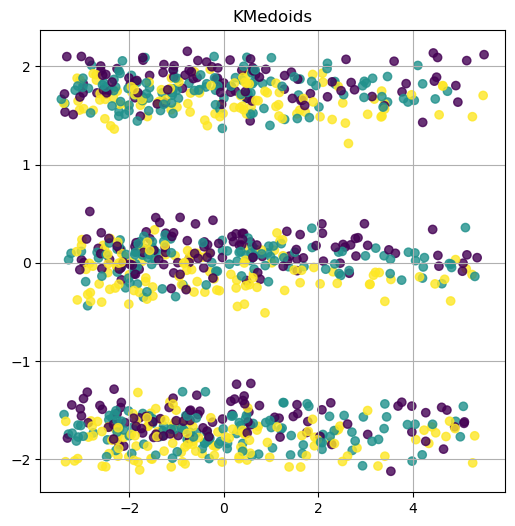

In [85]:
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(df_scaled.iloc[:, 14]))
plt.grid()
plt.title('KMedoids')
plt.show()

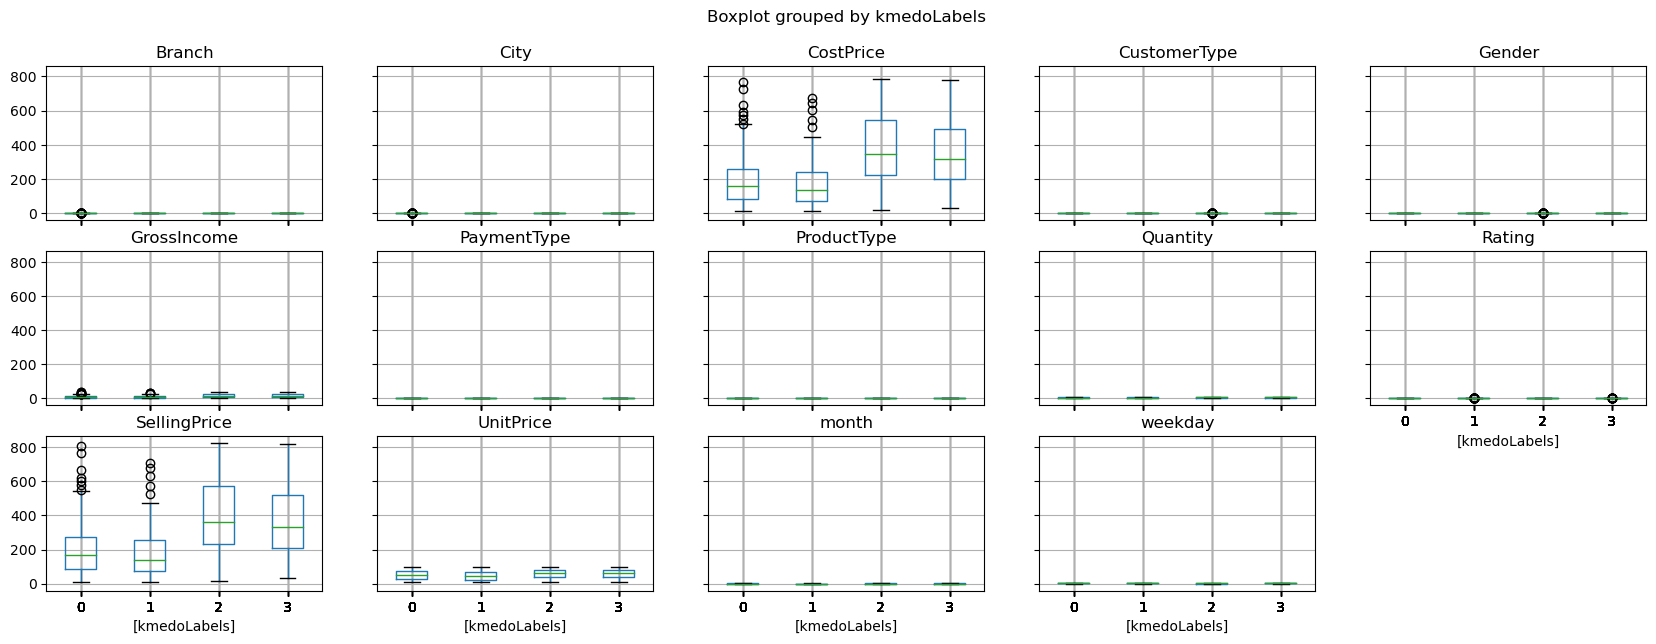

In [87]:
#k=3
kmedo = KMedoids(n_clusters =3, random_state=1)
kmedo.fit(df_scaled_copy)
df['KMedoids_Labels'] = kmedo.predict(df_scaled_copy)

df.kmedoLabels.value_counts()

original_features = ['Branch', 'City', 'CustomerType', 'Gender', 'ProductType',
       'UnitPrice', 'Quantity','SellingPrice', 'PaymentType', 'CostPrice', 'GrossIncome', 'Rating',
       'weekday','month']

mean = df.groupby('kmedoLabels').mean()
median = df.groupby('kmedoLabels').median()
df_kmedoids = pd.concat([mean, median], axis=0)
df_kmedoids.index = ['clus_0 Mean', 'clus_1 Mean', 'clus_2 Mean','clus_3 Mean', 'clus_0 Median', 'clus_1 Median', 'clus_2 Median','clus_3 Median']
df_kmedoids[original_features].T

features_with_lables = ['Branch', 'City', 'CustomerType', 'Gender', 'ProductType','UnitPrice', 'Quantity','SellingPrice', 'PaymentType', 'CostPrice', 'GrossIncome', 'Rating',
       'weekday','month','kmedoLabels']

df[features_with_lables].boxplot(by = 'kmedoLabels', layout = (3,5),figsize=(20,7))
plt.show()



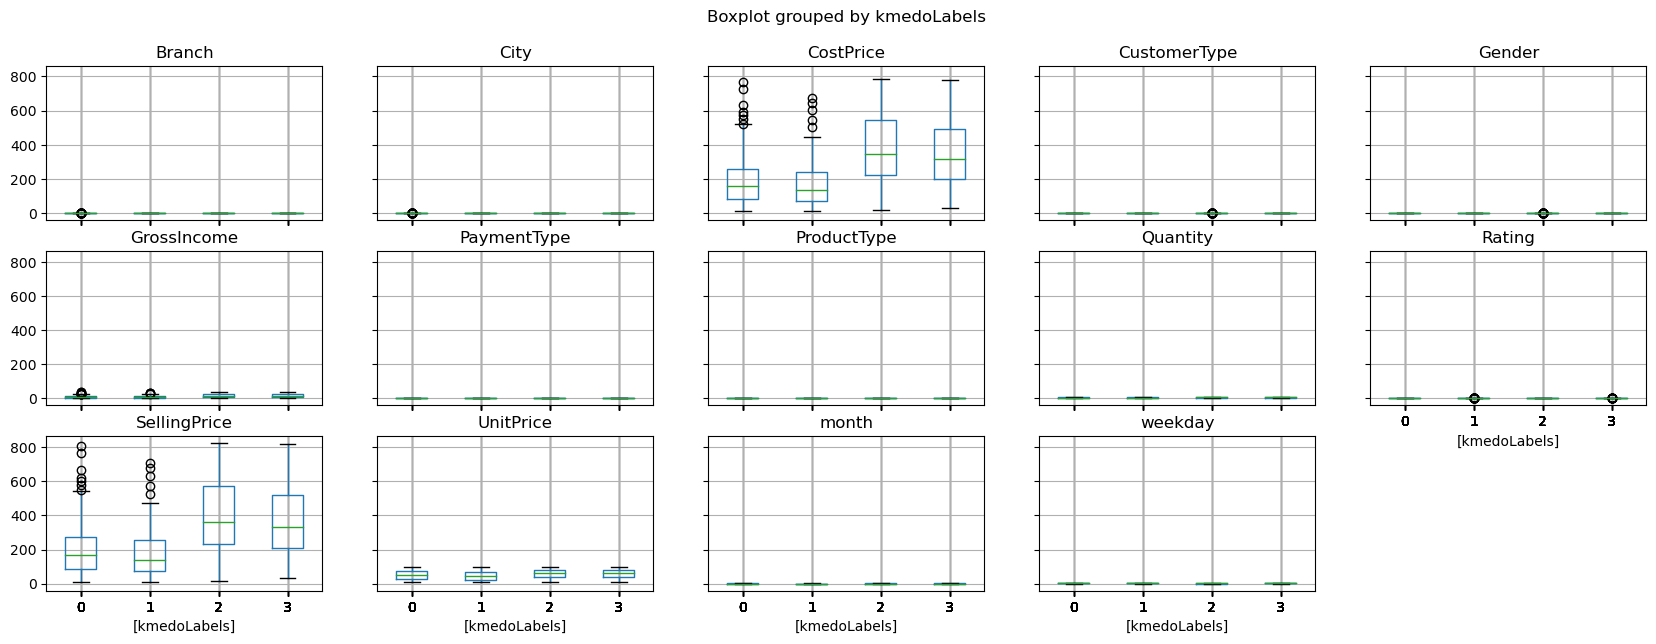

In [88]:
#k=2
kmedo = KMedoids(n_clusters =2, random_state=1)
kmedo.fit(df_scaled_copy)
df['KMedoids_Labels'] = kmedo.predict(df_scaled_copy)

df.kmedoLabels.value_counts()

original_features = ['Branch', 'City', 'CustomerType', 'Gender', 'ProductType',
       'UnitPrice', 'Quantity','SellingPrice', 'PaymentType', 'CostPrice', 'GrossIncome', 'Rating',
       'weekday','month']

mean = df.groupby('kmedoLabels').mean()
median = df.groupby('kmedoLabels').median()
df_kmedoids = pd.concat([mean, median], axis=0)
df_kmedoids.index = ['clus_0 Mean', 'clus_1 Mean', 'clus_2 Mean','clus_3 Mean', 'clus_0 Median', 'clus_1 Median', 'clus_2 Median','clus_3 Median']
df_kmedoids[original_features].T

features_with_lables = ['Branch', 'City', 'CustomerType', 'Gender', 'ProductType','UnitPrice', 'Quantity','SellingPrice', 'PaymentType', 'CostPrice', 'GrossIncome', 'Rating',
       'weekday','month','kmedoLabels']

df[features_with_lables].boxplot(by = 'kmedoLabels', layout = (3,5),figsize=(20,7))
plt.show()


# Agglomerative Hieracrchial Clusterig

In [89]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [13.75, 13.75, 52.5, 52.5],
  [75.0, 75.0, 85.0, 85.0],
  [95.0, 95.0, 105.0, 105.0],
  [80.0, 80.0, 100.0, 100.0],
  [115.0, 115.0, 125.0, 125.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [142.5, 142.5, 172.5, 172.5],
  [120.0, 120.0, 157.5, 157.5],
  [90.0, 90.0, 138.75, 138.75],
  [33.125, 33.125, 114.375, 114.375],
  [195.0, 195.0, 205.0, 205.0],
  [215.0, 215.0, 225.0, 225.0],
  [200.0, 200.0, 220.0, 220.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [305.0, 305.0, 315.0, 315.0],
  [290.0, 290.0, 310.0, 310.0],
  [270.0, 270.0, 300.0, 300.0],
  [325.0, 325.0, 335.0, 335.0],
  [345.0, 345.0, 355.0, 355.0],
  [365.0, 365.0, 375.0, 375.0],
  [350.0, 350.0, 370.0, 

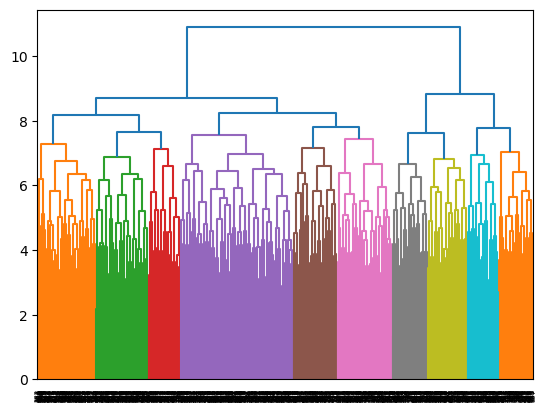

In [90]:
mergings = linkage(df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)

In [91]:
#k=2
cluster_labels = cut_tree(mergings, n_clusters=2).reshape(-1, )

df_scaled['Cluster_Labels'] = cluster_labels
df_scaled.head()

Branch      City  CustomerType    Gender  ProductType  UnitPrice  \
0 -1.208970 -1.208970     -0.998002  0.998002     0.319617   0.711694   
1  1.238338  1.238338      1.002002  0.998002    -1.430109  -1.517427   
2 -1.208970 -1.208970      1.002002 -1.002002     0.902859  -0.346194   
3 -1.208970 -1.208970     -0.998002 -1.002002     0.319617   0.107187   
4 -1.208970 -1.208970      1.002002 -1.002002     1.486101   1.165074   

   Quantity      Tax   SellingPrice  PaymentType  CostPrice  GrossIncome  \
0  0.509930  1.296858      1.260566     1.203528   1.261056     1.296858   
1 -0.174540 -1.055673     -1.022291    -1.205937  -1.023104    -1.055673   
2  0.509930  0.274019      0.245963    -0.001205   0.247012     0.274019   
3  0.852165  0.990006      0.972770     1.203528   0.969135     0.990006   
4  0.509930  1.705994      1.680066     1.203528   1.681014     1.705994   

     Rating   weekday     month  Time_Hour  Cluster_Labels  
0  1.192186 -0.528030 -0.052246  -0.599637               0  
1  1.192186 -1.531891  1.191708  -1.541474               1  
2 -0.838795 -0.026100  1.191708  -0.599637               1  
3  1.192186 -0.026100 -0.052246   1.597984               1  
4 -0.838795 -1.531891 -1.296200  -1.541474               0

<AxesSubplot:xlabel='Cluster_Labels', ylabel='GrossIncome'>

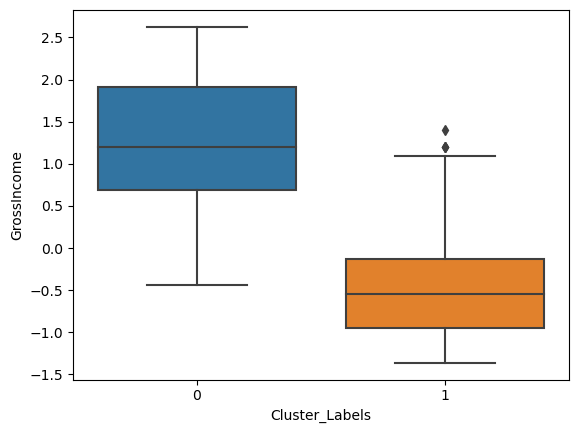

In [92]:
sns.boxplot(x='Cluster_Labels', y='GrossIncome', data=df_scaled)

In [93]:
#k=3
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )

df_scaled['Cluster_Labels'] = cluster_labels
df_scaled.head()

Branch      City  CustomerType    Gender  ProductType  UnitPrice  \
0 -1.208970 -1.208970     -0.998002  0.998002     0.319617   0.711694   
1  1.238338  1.238338      1.002002  0.998002    -1.430109  -1.517427   
2 -1.208970 -1.208970      1.002002 -1.002002     0.902859  -0.346194   
3 -1.208970 -1.208970     -0.998002 -1.002002     0.319617   0.107187   
4 -1.208970 -1.208970      1.002002 -1.002002     1.486101   1.165074   

   Quantity      Tax   SellingPrice  PaymentType  CostPrice  GrossIncome  \
0  0.509930  1.296858      1.260566     1.203528   1.261056     1.296858   
1 -0.174540 -1.055673     -1.022291    -1.205937  -1.023104    -1.055673   
2  0.509930  0.274019      0.245963    -0.001205   0.247012     0.274019   
3  0.852165  0.990006      0.972770     1.203528   0.969135     0.990006   
4  0.509930  1.705994      1.680066     1.203528   1.681014     1.705994   

     Rating   weekday     month  Time_Hour  Cluster_Labels  
0  1.192186 -0.528030 -0.052246  -0.599637               0  
1  1.192186 -1.531891  1.191708  -1.541474               1  
2 -0.838795 -0.026100  1.191708  -0.599637               1  
3  1.192186 -0.026100 -0.052246   1.597984               1  
4 -0.838795 -1.531891 -1.296200  -1.541474               0

<AxesSubplot:xlabel='Cluster_Labels', ylabel='GrossIncome'>

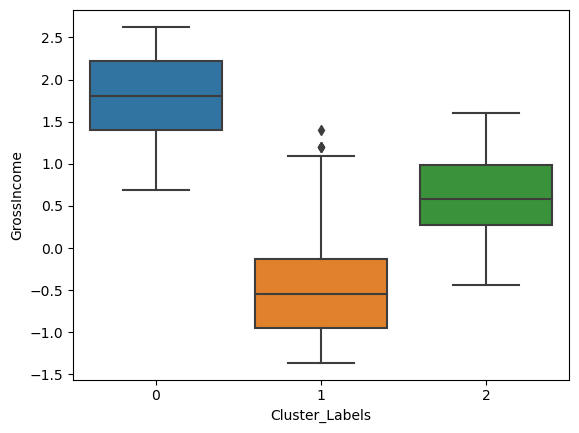

In [94]:
sns.boxplot(x='Cluster_Labels', y='GrossIncome', data=df_scaled)

In [95]:
#k=4
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )

df_scaled['Cluster_Labels'] = cluster_labels
df_scaled.head()

Branch      City  CustomerType    Gender  ProductType  UnitPrice  \
0 -1.208970 -1.208970     -0.998002  0.998002     0.319617   0.711694   
1  1.238338  1.238338      1.002002  0.998002    -1.430109  -1.517427   
2 -1.208970 -1.208970      1.002002 -1.002002     0.902859  -0.346194   
3 -1.208970 -1.208970     -0.998002 -1.002002     0.319617   0.107187   
4 -1.208970 -1.208970      1.002002 -1.002002     1.486101   1.165074   

   Quantity      Tax   SellingPrice  PaymentType  CostPrice  GrossIncome  \
0  0.509930  1.296858      1.260566     1.203528   1.261056     1.296858   
1 -0.174540 -1.055673     -1.022291    -1.205937  -1.023104    -1.055673   
2  0.509930  0.274019      0.245963    -0.001205   0.247012     0.274019   
3  0.852165  0.990006      0.972770     1.203528   0.969135     0.990006   
4  0.509930  1.705994      1.680066     1.203528   1.681014     1.705994   

     Rating   weekday     month  Time_Hour  Cluster_Labels  
0  1.192186 -0.528030 -0.052246  -0.599637               0  
1  1.192186 -1.531891  1.191708  -1.541474               1  
2 -0.838795 -0.026100  1.191708  -0.599637               2  
3  1.192186 -0.026100 -0.052246   1.597984               2  
4 -0.838795 -1.531891 -1.296200  -1.541474               0

<AxesSubplot:xlabel='Cluster_Labels', ylabel='GrossIncome'>

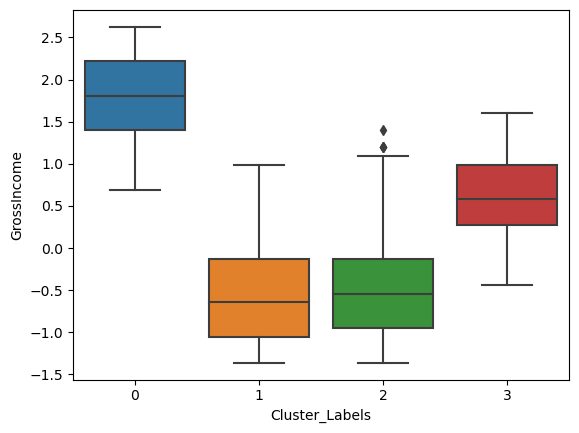

In [96]:
sns.boxplot(x='Cluster_Labels', y='GrossIncome', data=df_scaled)

# Train Test Split

In [97]:
from sklearn import tree
from sklearn.preprocessing import LabelBinarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,plot_precision_recall_curve,roc_auc_score

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)  

In [99]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)     

In [100]:
DTClf = tree.DecisionTreeClassifier()
DTClf.fit(x_train, y_train)
predictDT = DTClf.predict(x_test)
print(classification_report(y_test,predictDT))
print("\n")
lb = LabelBinarizer()
y_test1 = lb.fit_transform(y_test)
y_pred1 =lb.transform(predictDT)
print('AUC_ROC Score: ',roc_auc_score(y_test1,y_pred1,average='macro'))
print("")

Accuracy = (accuracy_score(y_test,predictDT)*100)
print('ACCURACY of Decision Tree (CART):', round(Accuracy,2),'%')
print("")
print(confusion_matrix(y_test,predictDT))

              precision    recall  f1-score   support

           0       0.58      0.59      0.58       114
           1       0.44      0.43      0.44        86

    accuracy                           0.52       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.52      0.52      0.52       200



AUC_ROC Score:  0.5089759281925745

ACCURACY of Decision Tree (CART): 52.0 %

[[67 47]
 [49 37]]


<AxesSubplot:>

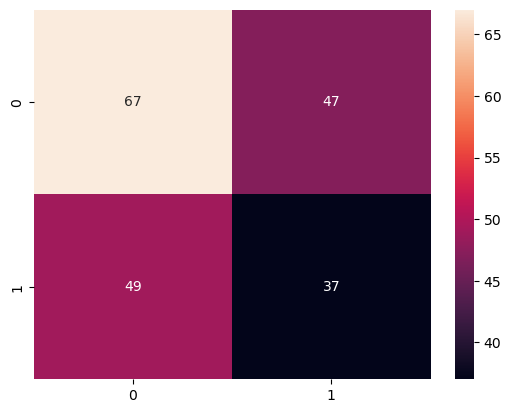

In [101]:
CF=confusion_matrix(y_test,predictDT)
sns.heatmap(CF,annot=True)

In [102]:
LGR = LogisticRegression()
LGR.fit(x_train, y_train)
predictLGR = LGR.predict(x_test)
print(classification_report(y_test,predictLGR))
print("\n")
lb = LabelBinarizer()
y_test2 = lb.fit_transform(y_test)
y_pred2 =lb.transform(predictLGR)
print('AUC_ROC Score: ',roc_auc_score(y_test2,y_pred2,average='macro'))
print("")
Accuracy = (accuracy_score(y_test, predictLGR)*100)
print('Accuracy of LGR:', round(Accuracy, 2), '%')
print("")
print(confusion_matrix(y_test, predictLGR)) 

              precision    recall  f1-score   support

           0       0.57      1.00      0.73       114
           1       0.00      0.00      0.00        86

    accuracy                           0.57       200
   macro avg       0.28      0.50      0.36       200
weighted avg       0.32      0.57      0.41       200



AUC_ROC Score:  0.5

Accuracy of LGR: 57.0 %

[[114   0]
 [ 86   0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



<AxesSubplot:>

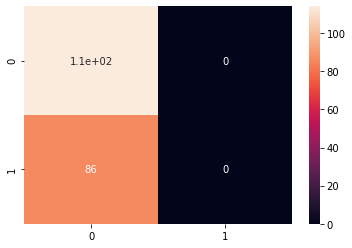

In [123]:
CF=confusion_matrix(y_test,predictLGR)
sns.heatmap(CF,annot=True)

In [103]:
results = pd.DataFrame({
                        "Model": ["Decision Tree Classifier","Logistic Regression"],
                        "Accuracy": [accuracy_score(y_test, predictDT)*100,accuracy_score(y_test, predictLGR)*100],
                        "AUC_ROC Score": [roc_auc_score(y_test1,y_pred1,average='macro'),roc_auc_score(y_test2,y_pred2,average='macro')]
                        })
result_df = results.sort_values(by="Accuracy", ascending=False)
result_df = result_df.set_index("Accuracy")
result_df.head(7)

Model  AUC_ROC Score
Accuracy                                         
57.0           Logistic Regression       0.500000
52.0      Decision Tree Classifier       0.508976

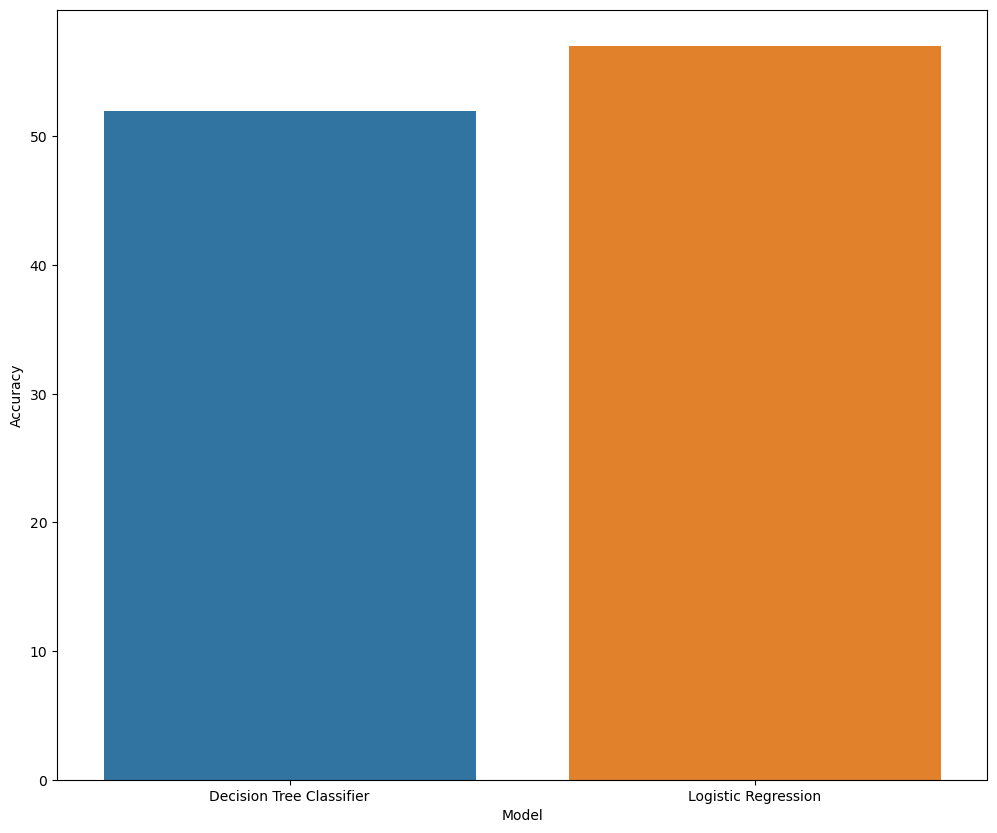

In [104]:
plt.figure(figsize=(12,10))
sns.barplot(x = 'Model',y = 'Accuracy',data = results)
plt.show()  

# Answering Objectives

In [105]:
#Load Supermarket_Sales_Dataset dataset into dataframe
IDSSMS_df = pd.read_csv("Supermarket_Sales_Dataset.csv")

#1. Which city has a better sale for products in the Electronic Accessories product line? 

In [106]:
df_elec = IDSSMS_df[IDSSMS_df['Product Type'] == 'Electronic accessories']
df_elec.head()

Invoice ID Branch       City Customer Type  Gender  \
1   226-31-3081      C     Mysore        Normal  Female   
5   699-14-3026      C     Mysore        Normal    Male   
6   355-53-5943      A  Bangalore        Member  Female   
11  529-56-3974      B  Mangalore        Member    Male   
12  365-64-0515      A  Bangalore        Normal  Female   

              Product Type  Unit Price  Quantity     Tax   Selling Price  \
1   Electronic accessories       15.28         5   3.8200        80.2200   
5   Electronic accessories       85.39         7  29.8865       627.6165   
6   Electronic accessories       68.84         6  20.6520       433.6920   
11  Electronic accessories       25.51         4   5.1020       107.1420   
12  Electronic accessories       46.95         5  11.7375       246.4875   

         Date   Time Payment Type  Cost Price  Gross Income  Rating  
1    3/8/2019  10:29         Cash       76.40        3.8200     9.6  
5   3/25/2019  18:30   Debit card      597.73       29.8865     4.1  
6   2/25/2019  14:36   Debit card      413.04       20.6520     5.8  
11   3/9/2019  17:03         Cash      102.04        5.1020     6.8  
12  2/12/2019  10:25   Debit card      234.75       11.7375     7.1

In [107]:
df_elec_sales = df_elec.groupby(["City"])["Selling Price"].sum()
df_elec_sales

City
Bangalore    18317.1135
Mangalore    17051.4435
Mysore       18968.9745
Name: Selling Price, dtype: float64

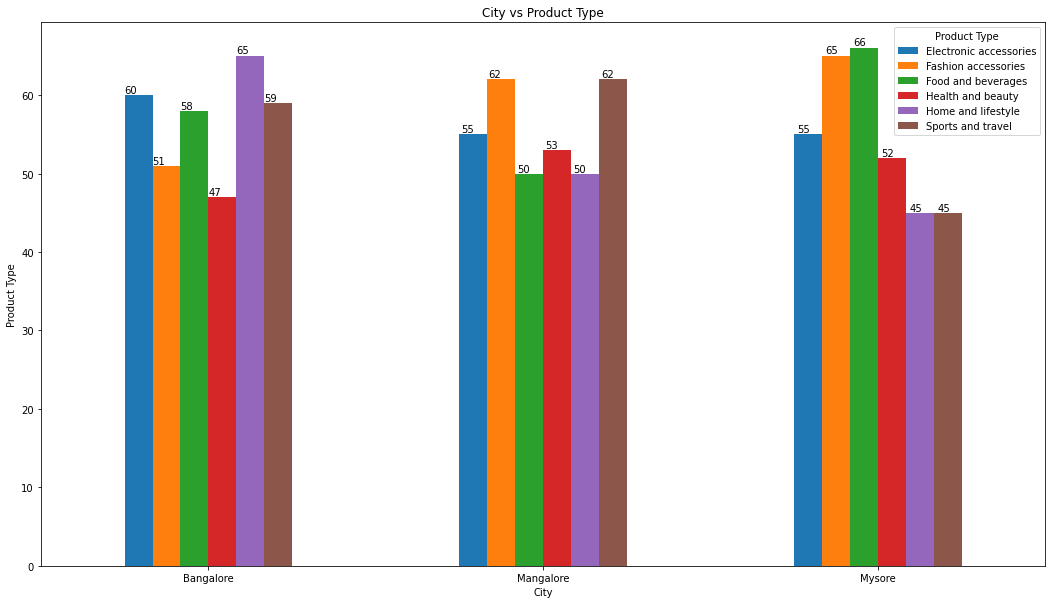

In [129]:
def crosstabplot(IDSSMS_df,feature,target):
    barplot = pd.crosstab(IDSSMS_df[feature],IDSSMS_df[target]).plot(kind="bar",figsize=(18,10))
    plt.title(feature+ " vs "+target)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.xticks(rotation=0)

    for p in barplot.patches:
        barplot.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
crosstabplot(IDSSMS_df,'City','Product Type')

From the above Bar graph it is shown as **Bangalore** city has a better sale of products in the Electronic Accessories product line

#2. Which payment method is used more often at a particular city, branch and for which product type

In [108]:
IDSSMS_df.groupby(["Branch","Product Type"])["Payment Type"].value_counts()

Branch  Product Type            Payment Type
A       Electronic accessories  Credit card     21
                                Debit card      21
                                Cash            18
        Fashion accessories     Debit card      21
                                Credit card     17
                                Cash            13
        Food and beverages      Credit card     21
                                Debit card      19
                                Cash            18
        Health and beauty       Cash            17
                                Debit card      16
                                Credit card     14
        Home and lifestyle      Debit card      26
                                Cash            24
                                Credit card     15
        Sports and travel       Debit card      23
                                Cash            20
                                Credit card     16
B       Electronic accessories  Cash 

In [109]:
df_A = IDSSMS_df[IDSSMS_df['Branch'] == 'A']
df_B = IDSSMS_df[IDSSMS_df['Branch'] == 'B']
df_C = IDSSMS_df[IDSSMS_df['Branch'] == 'C']

In [110]:
paym_branch_A = df_A.groupby(['Product Type', 'Payment Type']).size().reset_index(name='Counts')

In [111]:
paym_branch_A_count = df_A.groupby(["Payment Type"])["Product Type"].count()
paym_branch_A_count


Payment Type
Cash           110
Credit card    104
Debit card     126
Name: Product Type, dtype: int64

In [112]:
paym_branch_B_count = df_B.groupby(["Payment Type"])["Product Type"].count()
paym_branch_B_count

Payment Type
Cash           110
Credit card    109
Debit card     113
Name: Product Type, dtype: int64

In [113]:
paym_branch_C_count = df_C.groupby(["Payment Type"])["Product Type"].count()
paym_branch_C_count

Payment Type
Cash           124
Credit card     98
Debit card     106
Name: Product Type, dtype: int64

In [114]:
paym_branch_B = df_B.groupby(['Product Type', 'Payment Type']).size().reset_index(name='Counts')

In [115]:
paym_branch_C = df_C.groupby(['Product Type', 'Payment Type']).size().reset_index(name='Counts')

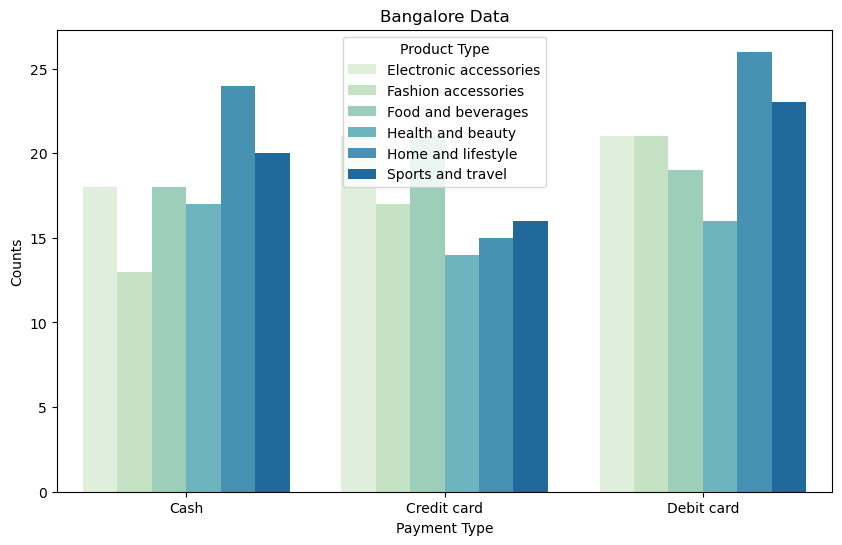

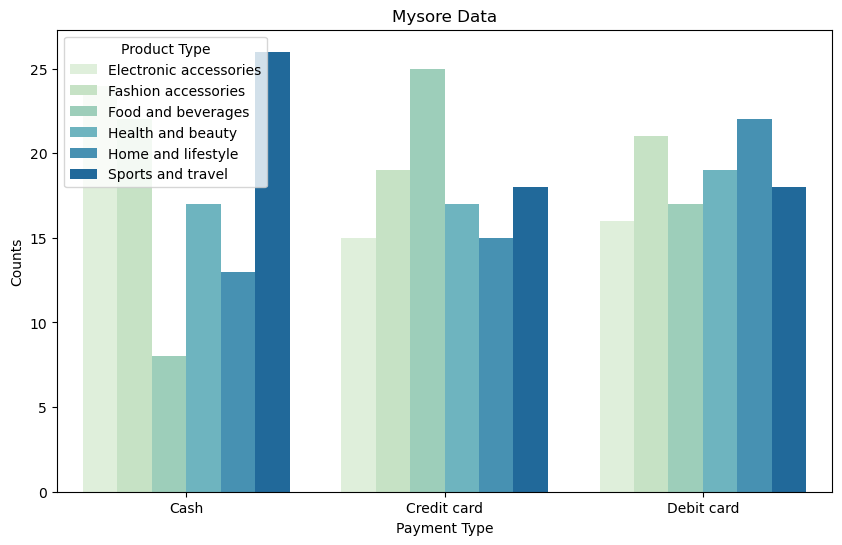

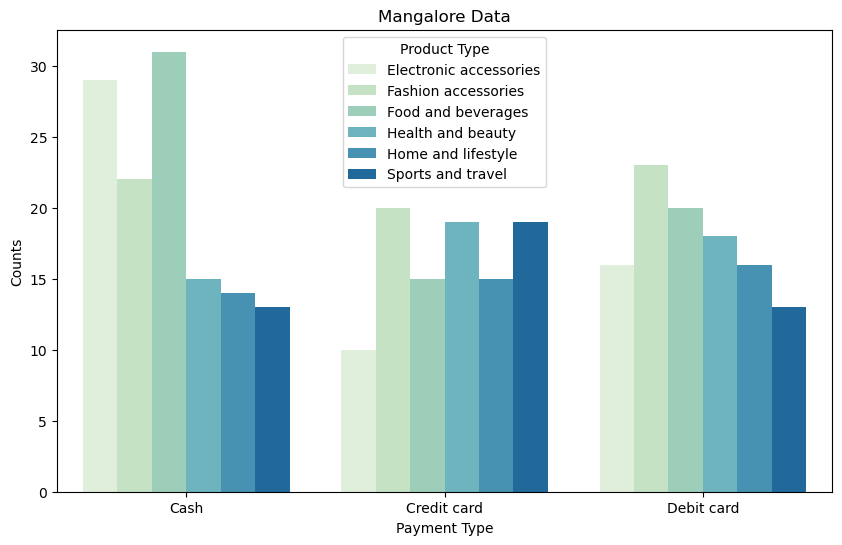

In [116]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Payment Type", y="Counts", hue="Product Type", data=paym_branch_A, ci=None, palette="GnBu")
plt.title('Bangalore Data');
plt.figure(figsize=(10, 6))
sns.barplot(x="Payment Type", y="Counts", hue="Product Type", data=paym_branch_B, ci=None, palette="GnBu")
plt.title('Mysore Data');
plt.figure(figsize=(10, 6))
sns.barplot(x="Payment Type", y="Counts", hue="Product Type", data=paym_branch_C, ci=None, palette="GnBu")
plt.title('Mangalore Data');

(1)**Bangalore** City: As can be seen from the graph above, the product type category for which **debit cards** are used more frequently is Home & Lifestyle. Cash is the second most common payment method in Bangalore City, with a count of 110, followed by credit cards with a count of 104.

(2) **Mysore** City: As you can see from the graph above, the category of products for which **debit cards** are used more frequently is Home & Lifestyle, and the most common payment method in Bangalore is debit cards, with a count of 113, followed by cash with a count of 110, and credit cards with a count of 109.

(3) **Mangalore** City: As you can see that **Cash** is the most used payment type in mangalore city with count of 124 followed by Debit card with the count 106 and lastly credit card with count 98 and the Food & Beverages is the product type category for which Debit card is used more oftenly, which is clearly shown in the graph above for mangalore city.

#3. Which Product type has been more purchased by female customers

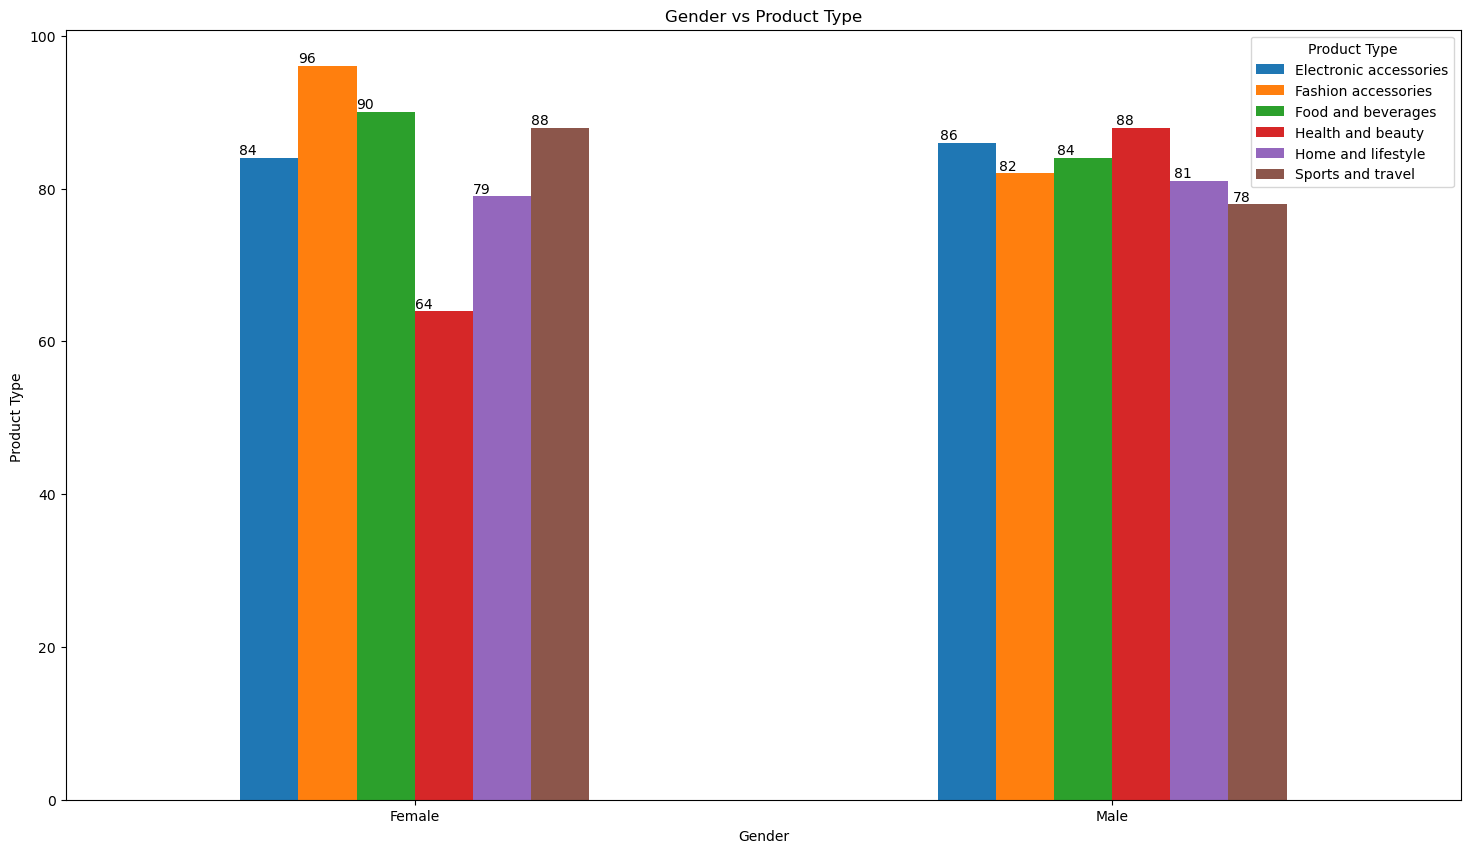

In [117]:
def crosstabplot(IDSSMS_df,feature,target):
    barplot = pd.crosstab(IDSSMS_df[feature],IDSSMS_df[target]).plot(kind="bar",figsize=(18,10))
    plt.title(feature+ " vs "+target)
    plt.xlabel(feature)
    plt.ylabel("Product Type ")
    plt.xticks(rotation=0)

    for p in barplot.patches:
        barplot.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
crosstabplot(IDSSMS_df,'Gender','Product Type')

From the above Bar graph it is shown as **Fashion accessories** product type has been more purchased by female customers.


#4. In which month does the highest number of home and lifestyle products have been sold

Home and lifestyle -> #4

In [118]:
df_home_life = df[df['ProductType'] == 4]

In [119]:
df_home_life_count = df_home_life.groupby(["month"])["ProductType"].count()
df_home_life_count

month
0    38
1    59
2    63
Name: ProductType, dtype: int64

Legends: 0-Jan, 1-Feb, 2-March

As you can see from the graph above, the month of **March** saw the highest sales of Home & Lifestyle products with a count of 63, followed by the month of January with a count of 59, and the month of February with a count of just 38.

<AxesSubplot:title={'center':'Home and lifestyle sales per month in all branches'}, xlabel='Months', ylabel='Total Number of sales'>

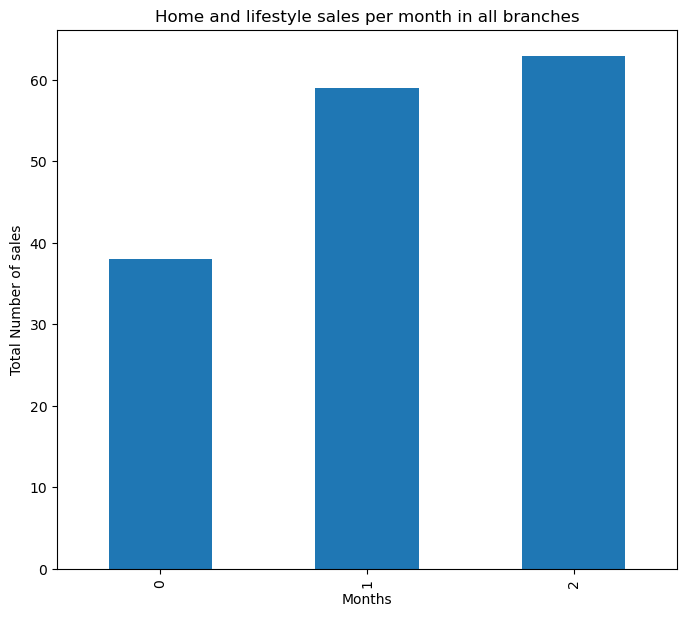

In [120]:
df_home_life_count.plot(kind='bar', title='Home and lifestyle sales per month in all branches', ylabel='Total Number of sales',
         xlabel='Months', figsize=(8, 7))

#5. At what time most of the female customers are purchasing products.

Legend: Female-1, Male-0

In [121]:
df_fem = supermarket_df[supermarket_df['Gender'] == 1]

In [122]:
df_fem.groupby(["Gender"])["Time_Hour"].value_counts()

Gender  Time_Hour
1       10           62
        13           61
        19           54
        11           47
        12           46
        18           45
        15           42
        14           39
        17           38
        16           36
        20           31
Name: Time_Hour, dtype: int64

Text(0, 0.5, 'Number of sales')

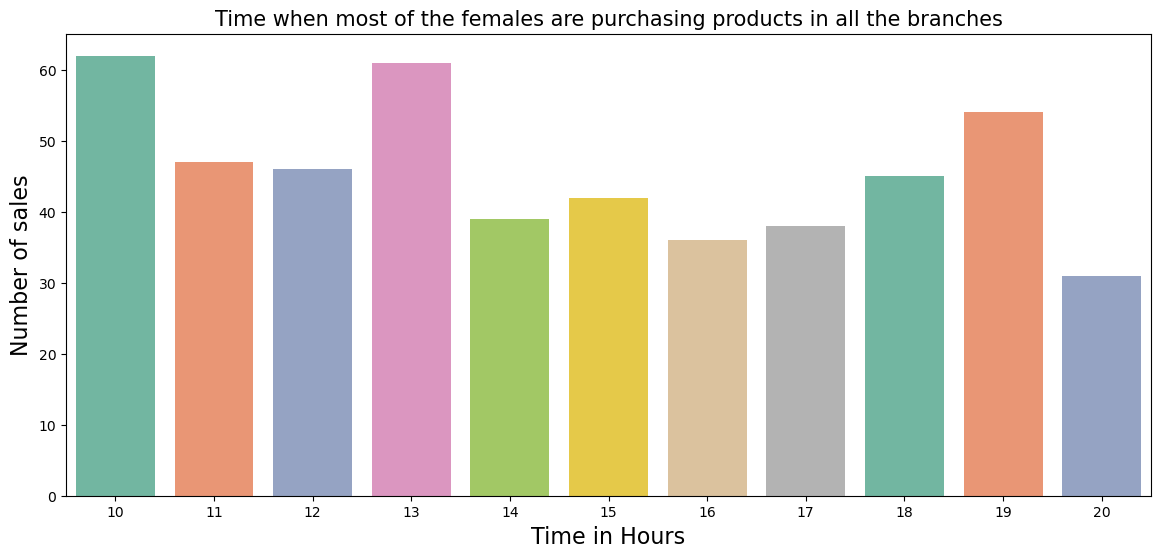

In [123]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x = "Time_Hour", data = df_fem, palette= "Set2")
ax.set_title(label = "Time when most of the females are purchasing products in all the branches", fontsize = 15)
ax.set_xlabel(xlabel = "Time in Hours", fontsize = 16)
ax.set_ylabel(ylabel = "Number of sales", fontsize = 16)

From the above observation we can say that the most of the females purchased products in the morning around **10:00 AM** followed by **1.00 PM** and then at **7.00 PM**